In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [ ]:
# Load the iris dataset
iris = load_iris()
# Convert it into a DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
# Add the target variable to the DataFrame
iris_df['species'] = iris.target
# Map target variable numbers to species names
iris_df['species'] = iris_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})


In [ ]:
# Display the first few rows of the dataset
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [ ]:
# Check the structure and types of the data
print(iris_df.info())

# Summary statistics
print(iris_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000      

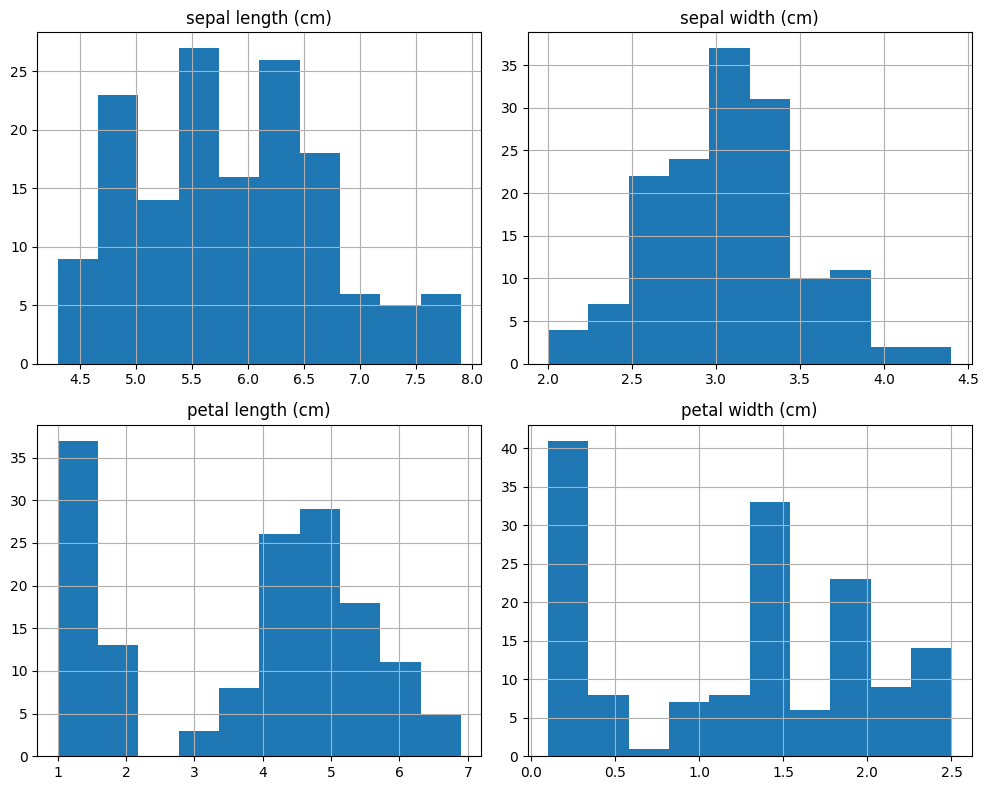

In [ ]:
# Histograms of all numerical features
iris_df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

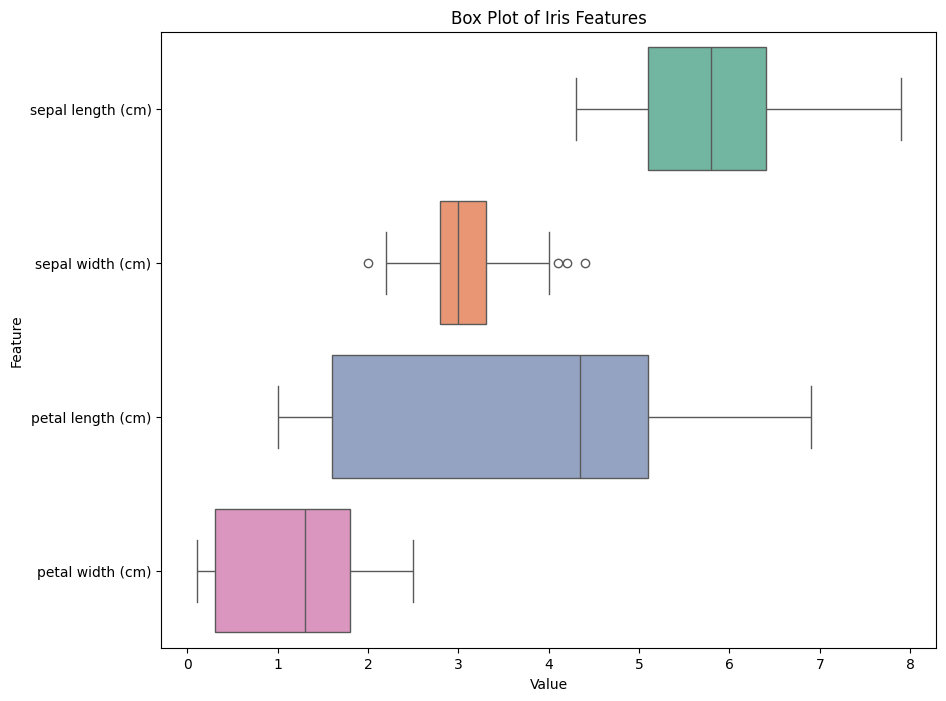

In [ ]:
# Box plots for each numerical feature, categorized by species
plt.figure(figsize=(10, 8))
sns.boxplot(data=iris_df, orient="h", palette="Set2")
plt.title('Box Plot of Iris Features')
plt.xlabel('Value')
plt.ylabel('Feature')
plt.show()


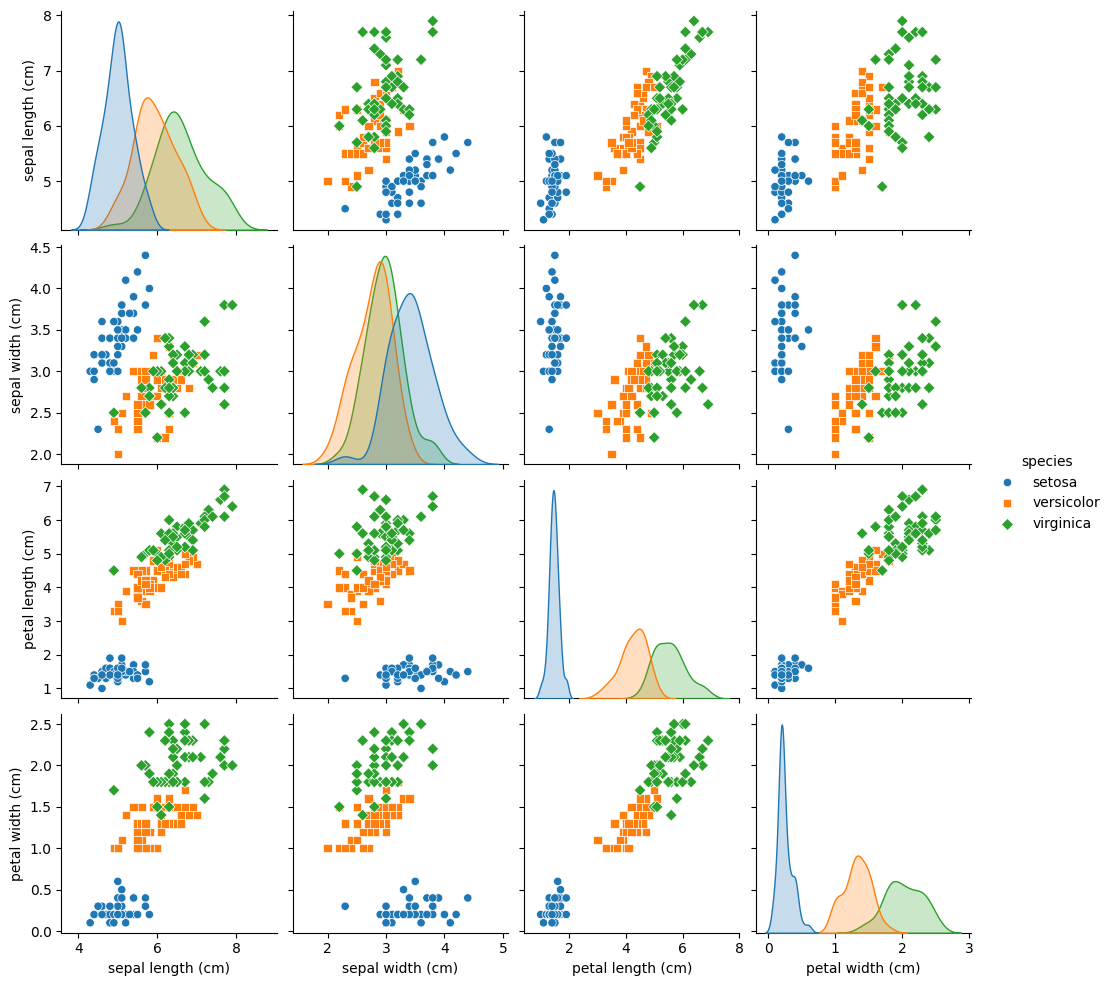

In [ ]:
# Pair plot to see pairwise relationships in the dataset
sns.pairplot(iris_df, hue='species', markers=["o", "s", "D"])
plt.show()


<ipython-input-9-d31c8998b055>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='species', y=feature, data=iris_df, palette="Set2")
<ipython-input-9-d31c8998b055>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='species', y=feature, data=iris_df, palette="Set2")
<ipython-input-9-d31c8998b055>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='species', y=feature, data=iris_df, palette="Set2")
<ipython-input-9-d31c8998b055>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.

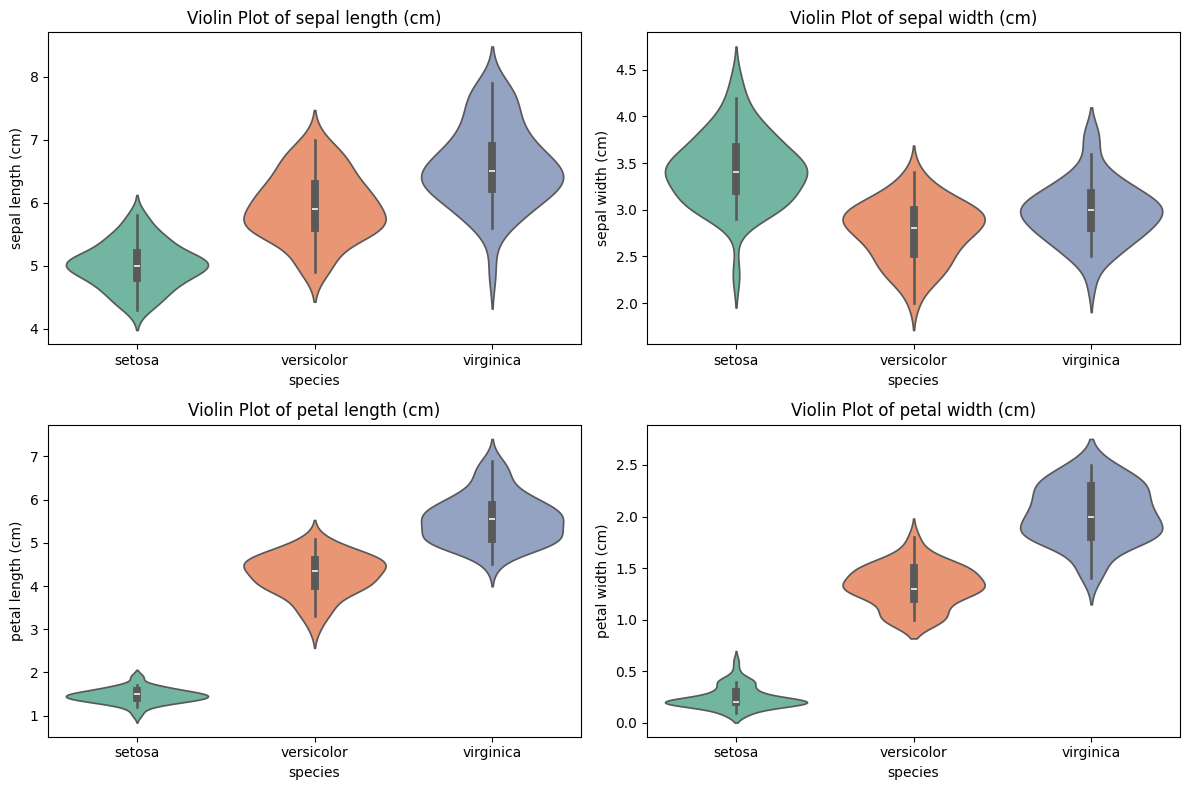

In [ ]:
# Violin plots for each numerical feature, categorized by species
plt.figure(figsize=(12, 8))
for i, feature in enumerate(iris_df.columns[:-1]):
    plt.subplot(2, 2, i+1)
    sns.violinplot(x='species', y=feature, data=iris_df, palette="Set2")
    plt.title(f'Violin Plot of {feature}')
plt.tight_layout()
plt.show()


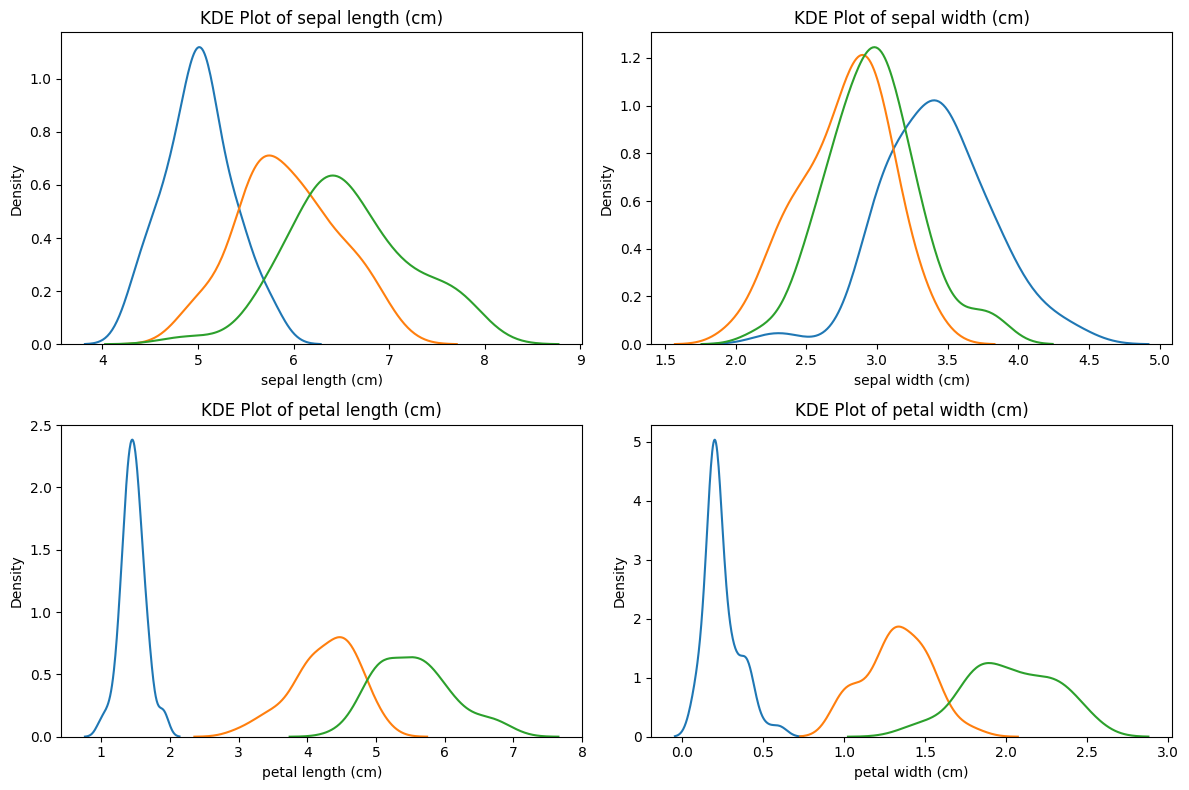

In [ ]:
# KDE plots for each feature categorized by species
plt.figure(figsize=(12, 8))
for i, feature in enumerate(iris_df.columns[:-1]):
    plt.subplot(2, 2, i+1)
    for species in iris_df['species'].unique():
        sns.kdeplot(iris_df[iris_df['species'] == species][feature], label=species)
    plt.title(f'KDE Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
plt.tight_layout()
plt.show()


<ipython-input-11-e6ece41e2814>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='species', y=feature, data=iris_df, palette="Set2")
<ipython-input-11-e6ece41e2814>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='species', y=feature, data=iris_df, palette="Set2")
<ipython-input-11-e6ece41e2814>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='species', y=feature, data=iris_df, palette="Set2")
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 6.0% of the points cannot be placed; you may want to d

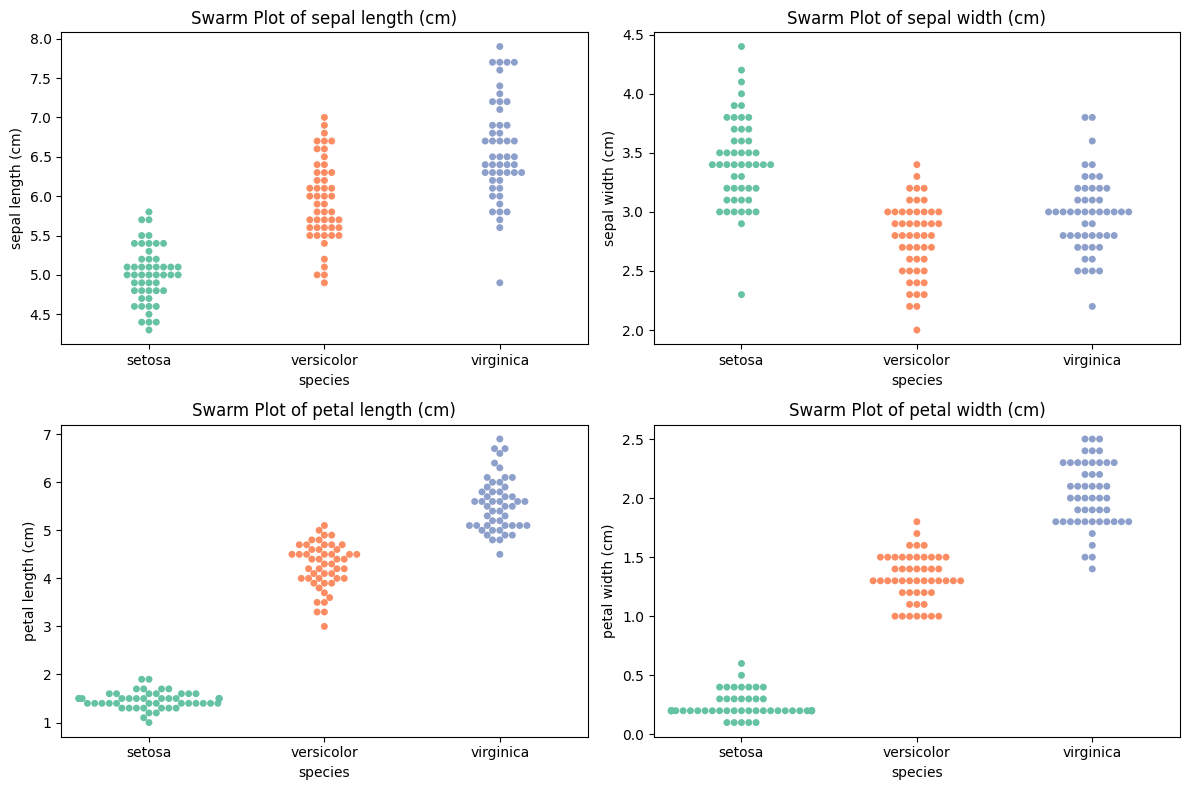

In [ ]:
# Swarm plots for each feature categorized by species
plt.figure(figsize=(12, 8))
for i, feature in enumerate(iris_df.columns[:-1]):
    plt.subplot(2, 2, i+1)
    sns.swarmplot(x='species', y=feature, data=iris_df, palette="Set2")
    plt.title(f'Swarm Plot of {feature}')
plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import f_oneway

# Perform ANOVA for each feature
for feature in iris_df.columns[:-1]:
    f_stat, p_val = f_oneway(
        iris_df[iris_df['species'] == 'setosa'][feature],
        iris_df[iris_df['species'] == 'versicolor'][feature],
        iris_df[iris_df['species'] == 'virginica'][feature]
    )
    print(f'ANOVA for {feature}: F-statistic = {f_stat:.2f}, p-value = {p_val:.5f}')


ANOVA for sepal length (cm): F-statistic = 119.26, p-value = 0.00000
ANOVA for sepal width (cm): F-statistic = 49.16, p-value = 0.00000
ANOVA for petal length (cm): F-statistic = 1180.16, p-value = 0.00000
ANOVA for petal width (cm): F-statistic = 960.01, p-value = 0.00000


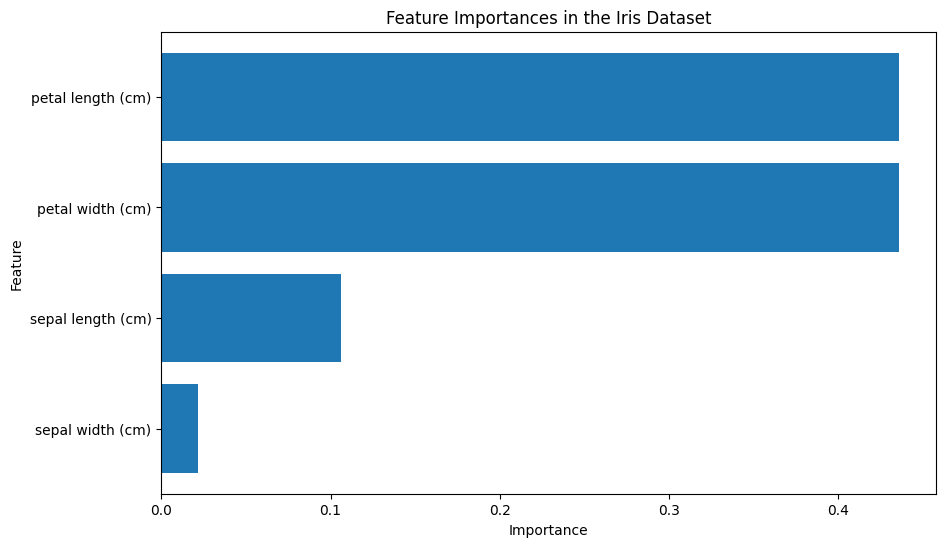

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Prepare data for Random Forest
X = iris_df[iris.feature_names]
y = iris_df['species']

# Initialize and fit the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Feature importance
importances = rf.feature_importances_
feature_names = iris.feature_names
sorted_indices = importances.argsort()

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_indices)), importances[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), [feature_names[i] for i in sorted_indices])
plt.title('Feature Importances in the Iris Dataset')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
